<a href="https://colab.research.google.com/github/sanchianatisha/EndTermTask/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas UAS Komputasi Intelegensia Pak Risman
#### **Nama** : Sanchia Natisha Kenzie
#### **NPM** : 2106724990

### Import Library yang dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Load Dataset **MNIST**

In [ ]:
# 1. Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Preprocessing Data

* *Reshape* gambar ke format **28x28x1** (ukuran gambar MNIST)
* Normalisasi pixel (0-1)
* *One-hot encode labels*



In [ ]:
# Reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Mendefinisikan Arsitektur Model
* 3 layer konvolusi dengan *max pooling*
* *Flatten layer* untuk transisi
* 2 *layer dense* (*fully connected*)
* *Dropout* untuk mencegah *overfitting*

In [ ]:
# 2. Build CNN Model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten layer to transition to fully connected
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

### Mengkompilasi Model

In [ ]:
# 3. Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### *Training* Model
* *Optimizer* : Adam
* *Loss function*: *Categorical Crossentropy*
* 10 *epochs*
* Validasi 20% dari data *training*

In [ ]:
# 4. Train Model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7715 - loss: 0.7060 - val_accuracy: 0.9787 - val_loss: 0.0728
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9661 - loss: 0.1237 - val_accuracy: 0.9862 - val_loss: 0.0475
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9776 - loss: 0.0806 - val_accuracy: 0.9869 - val_loss: 0.0445
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9829 - loss: 0.0618 - val_accuracy: 0.9872 - val_loss: 0.0416
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9842 - loss: 0.0547 - val_accuracy: 0.9886 - val_loss: 0.0419
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9879 - loss: 0.0426 - val_accuracy: 0.9908 - val_loss: 0.0367
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0.9904 - val_loss: 0.0397
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9900 - loss: 0.0348 - 

### Evaluasi Model

In [ ]:
# 5. Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9896 - loss: 0.0329
Test accuracy: 0.9919000267982483


### Visualisasi Training

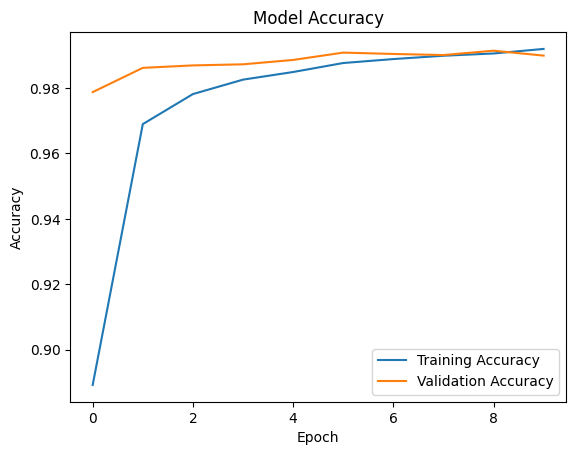

In [ ]:
# 6. Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Improvisasi Penulis

### Augmentasi Data
Penulis menambahkan teknik augmentasi data untuk meningkatkan keragaman data pelatihan dan mencegah overfitting. Anda bisa menggunakan ImageDataGenerator dari Keras, seperti rotasi, translasi, flipping, dan perubahan brightness.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

datagen.fit(train_images)

In [ ]:
# 4. Train Model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7706 - loss: 0.7017 - val_accuracy: 0.9788 - val_loss: 0.0713
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.1162 - val_accuracy: 0.9855 - val_loss: 0.0511
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9775 - loss: 0.0794 - val_accuracy: 0.9859 - val_loss: 0.0472
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9824 - loss: 0.0594 - val_accuracy: 0.9883 - val_loss: 0.0414
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9852 - loss: 0.0509 - val_accuracy: 0.9886 - val_loss: 0.0436
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9903 - loss: 0.0334 - val_accuracy: 0.9897 - val_loss: 0.0400
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.

In [ ]:
# 5. Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0490
Test accuracy: 0.9897000193595886


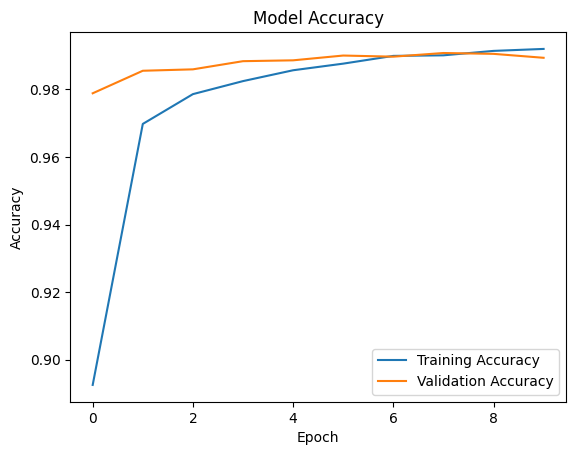

In [ ]:
# 6. Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()